## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 4: Linear Algebra
## Due November 5, 2023 by 11:59 PM
### <span style="color: red">David Petkov</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.


In [ ]:
import math
import scipy
import scipy.ndimage
from scipy.linalg import expm
import numpy as np
import sympy as sm
from numpy.linalg import matrix_rank
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

### 1. Linear independence
---

Which of the following sets of vectors are linearly independent? Why?

a) $\left (\begin{array}{c}
1 \\
2 \\
3 \\
4\end{array}\right )$ and
$\left (\begin{array}{c}
5 \\
6 \\
7 \\
8\end{array}\right )$

b) $\left (\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}\right )$,
$\left (\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}\right )$,
$\left (\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}\right )$ and
$\left (\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}\right )$

c)
$\left (\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}\right )$,
$\left (\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}\right )$,
$\left (\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}\right )$ and
$\left (\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}\right )$

## Answer to Problem 1

A matrix is linearly independent if it has full rank, meaning no vector from a set can be represented as a combination of the remaining vectors. I will use the function matrix_rank() from numpy to find the rank of each matrix above to determine linear indpendence.

In [ ]:
# Using python to find linear independence of matrices
A = np.matrix([
    [1,5],
    [2,6],
    [3,7],
    [4,8]
])
if matrix_rank(A) == 2:
  print("Matrix A has full rank and is linearly independent")
else:
  print("Matrix A is not linearly independent since it does not have full rank")

Matrix A has full rank and is linearly independent


In [ ]:
B = np.matrix([
    [1,0,0,1],
    [1,0,1,0],
    [0,1,1,0],
    [0,1,0,1]
])
if matrix_rank(B) == 4:
  print("Matrix B has full rank and is linearly independent")
else:
  print("Matrix B is not linearly independent because it does not have full rank")

Matrix B is not linearly independent because it does not have full rank


In [ ]:
C = np.matrix([
    [1,0,0,0],
    [1,0,1,1],
    [0,1,1,0],
    [0,1,0,1]
])
if matrix_rank(C) == 4:
  print("Matrix C has full rank and is linearly independent")
else:
  print("Matrix C is not linearly independent since it does not have full rank")

Matrix C has full rank and is linearly independent


### 2. Orthogonality
---

a) Find two orthogonal vectors that are also orthogonal to the vector
$$v = \left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$$

b) Argue that the resulting set of three vectors form a basis for for $\mathbb{R}^3$.

c) Express the vector $$x = \left (
\begin{array}{c}
1 \\
2 \\
3
\end{array}
\right)$$ as a linear combination of your three vectors.

## Answer to Problem 2
**Def:** Two vectors $u$ and $v$ are **orthogonal** if $u^Tv = 0$.

a) Two vectors are orthogonal if their dot product is equal to 0. Code is below for two orthogonal vectors.

b) A set of linearly independent $n$ vectors $v_1,...,v_k$ can have at most $n$ elements, so $k \leq n$. Additionally, they form the basis $\mathbb{R}^3$ if their scalars $ a_1,...a_n$ need to be equal to $0$ to satisfy:

$$
a_1 v_1+a_2 v_2+...a_n v_n=0
$$

In the case for problem $2a$, the three vectors do form the basis for $\mathbb{R}^3$ because the matrix is linearly independent with full rank as shown in the code below.

c) If $Ax=b$, then $A^{-1}b=x$. Also assume vector $(1,2,3)$ from above is $b$ for this definition. The solution is in the code below.


In [ ]:
# Problem 2a
# Define vector v as above
v = np.array([1,-1,3])

# Define orthogonal vectors
u1 = np.array([2,-1,-1])
u2 = np.array([3,0,-1])

# Show that dot product between defined vectors equals 0
print("Vector v times (2,-1,-1) will equal 0 if orthogonal:",np.dot(v,u1))
print("Vector v times (3,0,-1) will equal 0 if orthogonal:",np.dot(v,u2))

Vector v times (2,-1,-1) will equal 0 if orthogonal: 0
Vector v times (3,0,-1) will equal 0 if orthogonal: 0


In [ ]:
# Proof of linear independence for problem 2b
B = np.matrix([
    [1,2,3],
    [-1,-1,0],
    [3,-1,-1]
])
if matrix_rank(B) == 3:
  print("Matrix B has full rank and is linearly independent")
else:
  print("Matrix B is not linearly independent since it does not have full rank")

Matrix B has full rank and is linearly independent


In [ ]:
# Code for Problem 2c

# Generate a linearly independent matrix
A = np.matrix([
    [1,2,3],
    [-1,-1,0],
    [3,-1,-1]
])
b = np.array([1,2,3])
x=solve(A,b) # Solve for x through A^-1 * b
x

array([ 0.72727273, -2.72727273,  1.90909091])

### 3. Inverses
---
Find the inverse of each of the following matrices, or explain why no inverse exists.

$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

$ B = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & -1 & 0
\end{pmatrix}
$

## Answer to Problem 3

The code below will be used to verify the statements.

Matrix A will have an inverse because it has a non-zero determinant and is linearly independent (full rank).

Matrix B will not have an inverse because it has a determinant of 0 and doesn't have full rank.

In [ ]:
#3a - Use python to find the inverse
# Define the matrix. A is a square matrix, so if it is has a non-zero determinant, and full rank, it has an inverse.
A = np.matrix([
    [0,1,1],
    [1,0,1],
    [1,1,0]
])

# Use det() and and matrix_rank() functions to find determinant and rank of the matrix
print("Determinant of Matrix A is:",np.linalg.det(A)) # Non-zero
print("Rank of Matrix A is:",matrix_rank(A)) # Full rank

Determinant of Matrix A is: 2.0
Rank of Matrix A is: 3


In [ ]:
# 3a - Determinant is not 0, so the matrix has an inverse
from numpy.linalg import inv
inv(A)

matrix([[-0.5,  0.5,  0.5],
        [ 0.5, -0.5,  0.5],
        [ 0.5,  0.5, -0.5]])

In [ ]:
#3b - Use python to find the inverse
# Define the matrix. B is a square matrix, so if it is has a non-zero determinant, and full rank, it has an inverse.
B = np.matrix([
    [0,1,1],
    [1,0,1],
    [1,-1,0]
])
print("Determinant of Matrix A is:",np.linalg.det(B)) # 0 is the determinant
print("Rank of Matrix A is:",matrix_rank(B)) # Not full rank

Determinant of Matrix A is: 0.0
Rank of Matrix A is: 2


### 4. Commutativity
---

In three dimensions, there are three different kinds of **rotations**, one for rotation about each axis. These are defined as follows:

$$
R_x(\theta) =
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos \theta  & \sin \theta  \\
0 & -\sin \theta & \cos \theta
\end{pmatrix}.
$$

$$
R_y(\theta) =
\begin{pmatrix}
\cos \theta  & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta
\end{pmatrix}.
$$

$$
R_z(\theta) =
\begin{pmatrix}
\cos \theta  & \sin \theta & 0 \\
-\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Are these matrices pairwise commutative in general? That is: is it the case that

$$
R_x(\theta_1)R_y(\theta_2) = R_y(\theta_2)R_x(\theta_1)
$$

and similarly for $x,z$ and $y,z$? Explain your answers.

## Answer to Problem 4

Assume $\theta_1=\theta_2$

None of these matrices are commutative with each other, all products of matrices are below and it is the case that:
$R_x(\theta)R_y(\theta) \neq R_y(\theta)R_x(\theta)$, \\
$R_x(\theta)R_z(\theta) \neq R_z(\theta)R_x(\theta)$, and \\
$R_z(\theta)R_y(\theta) \neq R_y(\theta)R_z(\theta)$

\\
The matrix product of $R_x$ with $R_y$ and $R_y$ with $R_z$ in any order have the same elements in the diagonal. They also have similar elements in their upper and lower triangles except in a different order. Thus they all have the same 9 elements, including the same ones in the diagonal, but they are not commutative.

The same cannot be said for the matrix product of $R_x$ and $R_z$ in both orders. They only have the same elements diagonally.

* I would like to note that I'm not sure what the difference between commutatuve and pairwise commutative is. I did research but couldnt find anything on pairwise commutative matrices. If pairwise means same elements regardless of location on matrix, then it is only true for $R_x$ with $R_y$ and $R_y$ with $R_z$ in any order.

\\
$$
R_x(\theta)R_y(\theta) =
\begin{pmatrix}
\cos \theta & 0 & \sin \theta \\
- \sin^2 \theta & \cos \theta  & \sin \theta  \cos \theta \\
-\sin \theta \cos \theta & -\sin \theta & \cos^2 \theta
\end{pmatrix}
$$

\\
$$
R_y(\theta)R_x(\theta) =
\begin{pmatrix}
\cos \theta & - \sin^2 \theta & \sin \theta \cos \theta \\
0 & \cos \theta  & \sin \theta  \\
- \sin \theta  & -\sin \theta \cos \theta & \cos^2 \theta
\end{pmatrix}
$$

\\
$$
R_x(\theta)R_z(\theta) =
\begin{pmatrix}
\cos \theta &  \sin \theta  &  0 \\
- \sin \theta \cos \theta & \cos^2 \theta  & \sin \theta  \\
\sin^2 \theta  & -\sin \theta \cos \theta & \cos \theta
\end{pmatrix}
$$

\\
$$
R_z(\theta)R_x(\theta) =
\begin{pmatrix}
\cos \theta &  \sin \theta \cos \theta &  \sin^2 \theta \\
- \sin \theta & \cos^2 \theta  & \sin \theta \cos \theta \\
0  & -\sin \theta  & \cos \theta
\end{pmatrix}
$$

\\
$$
R_y(\theta)R_z(\theta) =
\begin{pmatrix}
\cos^2 \theta &  \sin \theta \cos \theta &  \sin \theta \\
- \sin \theta & \cos \theta  & 0 \\
- \sin \theta \cos \theta  & -\sin^2 \theta  & \cos \theta
\end{pmatrix}
$$

\\
$$
R_z(\theta)R_y(\theta) =
\begin{pmatrix}
\cos^2 \theta &  \sin \theta & \sin \theta \cos \theta \\
- \sin \theta \cos \theta & \cos \theta  & - \sin^2 \theta \\
- \sin \theta  & 0  & \cos \theta
\end{pmatrix}
$$

### 5. Orthogonal Matrices
---

The set of **reflection matrices** is defined by

$$
S(\theta) =
\begin{pmatrix}
\cos 2\theta & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta
\end{pmatrix}.
$$

a) Show how $S(\frac{\pi}{4})$ transforms the vector $(1\;-1)^T$.

b) Show that $S(\theta)$ does not change any vectors that happen to lie on the axis of reflection.

## Answers to Problem 5

a)
$
S(\frac{\pi}{4}) =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$

\\
$
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
=b
$

Solution below in python code.

b)

Step 1: Find Eigenvalues
$$
S(\theta) - \lambda I =
\begin{pmatrix}
\cos 2\theta - \lambda & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta - \lambda
\end{pmatrix}.
$$
$$
|S(\theta) - \lambda I |= (\cos 2\theta - \lambda)(- \cos 2\theta - \lambda) - \sin^2(2 \theta)
$$
$$
= -(\cos^2 2\theta + \sin^22 \theta)- \lambda \cos 2\theta + \lambda \cos 2\theta + \lambda^2
$$
$$
= -1+ \lambda^2 = \lambda \pm 1
$$

Step 2a: Find Eigenvectors $ \lambda = 1$
$$
(S(\theta) -  I) \cdot v =
\begin{pmatrix}
\cos 2\theta - 1 & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta - 1
\end{pmatrix} \times
\begin{pmatrix}
\ v_1  \\
\ v_2
\end{pmatrix} =
\begin{pmatrix}
 0 \\
 0
\end{pmatrix}
$$
$$
v_1 \cos(2 \theta)- v_1 +v_2 \sin(2 \theta)=0 \\
v_1 \sin(2 \theta) -v_2 \cos(2 \theta) - v_2=0
$$

Step 2b: Find Eigenvectors $ \lambda = -1$
$$
(S(\theta) -  I) \cdot v =
\begin{pmatrix}
\cos 2\theta + 1 & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta + 1
\end{pmatrix} \times
\begin{pmatrix}
\ v_1  \\
\ v_2
\end{pmatrix} =
\begin{pmatrix}
 0 \\
 0
\end{pmatrix}
$$
$$
v_1 \cos(2 \theta)+ v_1 +v_2 \sin(2 \theta)=0 \\
v_1 \sin(2 \theta) -v_2 \cos(2 \theta) + v_2=0
$$

Step 3: Solution

Eigenvalues have a zero vector, thus the Matrix $S$ does not change vectors along the axis of reflection.

$$ v_1 = v_2 = 0 \ \bf or \ \begin{pmatrix}
 0 \\
0
\end{pmatrix} $$

In [ ]:
# Answer for Problem 5a
# set theta to pi/4 and obtain new matrix S
S = np.array([
    [0,1],
    [1,0]
])
x = np.array([[1],[-1]])
b=np.dot(S,x)
b

array([[-1],
       [ 1]])

### 6. Similarity
---

Show that the following two matrices are similar.

$
A = \begin{pmatrix}
2 & 4 & 6 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$

$
B = \begin{pmatrix}
1 & -1 & 2 \\
4 & 2 & 1 \\
5 & 1 & 1
\end{pmatrix}
$

## Answer to Problem 6

Matrices are similar if they have the same properties:


*   Determinant: $|B| = |Q A Q^{-1}| = |Q||Q^{-1}||A| = |A|$.
*   Eigenvalues
*   Characteristic Polynomial: $|\lambda I - B| = |\lambda I - A|$

In [ ]:
# Code for Problem 6, Determinants and Eigenvalues
# Proving similarity using Python

# Define both matrices
A = sm.Matrix([
    [2,4,6],
    [0,2,0],
    [1,1,0]
])
B = sm.Matrix([
    [1,-1,2],
    [4,2,1],
    [5,1,1]
])

# Evaluate determinants
if abs(A.det()) == abs(B.det()):
  print("Matrix A and B have same determinant: ", abs(A.det()))
else:
  print("Matrix A and B don't have same determinant")

# Evaluate eigenvalues
if A.eigenvals() == B.eigenvals():
  print("Matrix A and B have same eigenvalues: ")
else:
  print("Matrix A and B don't have same eigenvalues")

for x in A.eigenvals().keys():
  print(x)

Matrix A and B have same determinant:  12
Matrix A and B have same eigenvalues: 
2
1 - sqrt(7)
1 + sqrt(7)


In [ ]:
# Additional code for Problem 6, Characteristic Polynomial
s = sm.symbols("s")
A = sm.Matrix([
    [2,4,6],
    [0,2,0],
    [1,1,0]
])
B = sm.Matrix([
    [1,-1,2],
    [4,2,1],
    [5,1,1]
])

cpA = (s*sm.eye(3)-A).det()
cpB = (s*sm.eye(3)-B).det()

if cpA == cpB:
  print("Matrix A and B have the same characteristic Polynomial:")
else:
  print("Matrix A and B do not have the same characteristic Polynomial")

cpA

Matrix A and B have the same characteristic Polynomial:


 3      2           
s  - 4⋅s  - 2⋅s + 12

### 7. Diagonalization
---

Diagonalize the matrices in problem 6 (you can use `sympy`), and show they have the same diagonal form.

## Answer for Problem 7
For matrix $A = \mathbb{R}^{n \times n}$, $A$ will have distinct eigenvalues and eigenvectors: $\lambda_1$ and $\lambda_2$, $v_1$ and $v_2$. Then:

$$
A v_1 = \lambda_1 v_1 \\
A v_2 = \lambda_2 v_2
$$

\\
If we define:
$$
P = ( v_1 \; v_2 )
$$

and

$$
D = \begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

then we get

$$
A = PDP^{-1}
$$

\\
I will use the diagonalize() function from sympy which returns a tuple of $P$ and $D$ as they relate to matrices $A$ and $B$.

In [ ]:
# Code for Problem 7
# Proving same diagonal form using Python

# Define both matrices again just to be safe
A = sm.Matrix([
    [2,4,6],
    [0,2,0],
    [1,1,0]
])
B = sm.Matrix([
    [1,-1,2],
    [4,2,1],
    [5,1,1]
])

# Use diagonalize() function which returns P and D as defined above
AD = A.diagonalize()
BD = B.diagonalize()
if AD[1] == BD[1]: # Remove the first element of the tuples since we do not need P
  print("Matrices A and B have same diagonal")
else:
  print("Matrices do not have same diagonal")

print("Diagonal of A")
AD[1] # Print only diagonal for A

Matrices A and B have same diagonal
Diagonal of A


⎡2    0       0   ⎤
⎢                 ⎥
⎢0  1 - √7    0   ⎥
⎢                 ⎥
⎣0    0     1 + √7⎦

In [ ]:
print("Diagonal of B")
BD[1] # We show that the diagonal for B is the same as A

Diagonal of B


⎡2    0       0   ⎤
⎢                 ⎥
⎢0  1 - √7    0   ⎥
⎢                 ⎥
⎣0    0     1 + √7⎦

### 8. Cayley Hamilton
---

a) Use the **Cayley-Hamilton Theorem** to come up with an expression for $A^n$ in terms of $n$ when

$$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} .
$$

b) Define $x_{k+1} = A x_k$ and argue that no matter what value $x_0$ is, $x_k$ converges to $(0 \; 0)^T$.

c) Choose $x_0 = (-2,3)^T$ and plot $x_k$ for $k = 0$ to $10$. Plot the two components of of $x_k$ as two separate trajectories overlaid on the same plot.

## Answers to Problem 8

a) $A^n = -0.25A^{n-1}+0.125A^{n-2}$ for $n \geq 2$

b) Since $ \lambda^2+0.25 \lambda-0.125 = 0 $, we have $\lambda = 0.25, -0.5$


$x_{k+1}=Ax_k=A^2x_{k-1}...=A^{k+1}x_0$. As $k \rightarrow \infty $, the $\lim_{k \rightarrow \infty} A^kx_0=0$


In [ ]:
# Characteristic Polynomial for Problem 8
s = sm.symbols("s")
A = sm.Matrix([
    [-.5,1],
    [0,1/4]
])
cp = (s*sm.eye(2)-A).det()
cp

 2                 
s  + 0.25⋅s - 0.125

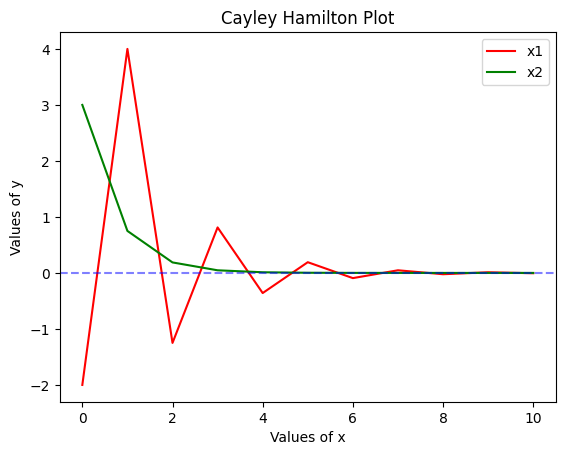

In [ ]:
# Code for Problem 8c

# Create lists which will contain the calculated values, insert initial values.
List1 = [-2]
List2 = [3]

# Set initial conditions
x_1 = -2
x_2 = 3

# Use for loop to calculate both components
for x in range(1,11):
  x1=(-.5)*x_1+(x_2)
  x2= .25*x_2
  List1.append(x1)
  List2.append(x2)
  x_1=x1
  x_2=x2

# Plot characteristics
plt.title("Cayley Hamilton Plot") # Add title
plt.xlabel("Values of x") # Add axis labels
plt.ylabel("Values of y")
plt.plot(List1, "-r", label="x1") # Plot f o g in red
plt.plot(List2, "-g", label="x2") # Plot g o f in green
plt.legend(loc="best") # Put the legend in the 'best' spot
plt.axhline(y = 0,color = 'blue', linestyle = '--', alpha = 0.5)
plt.show()

### 9. Matrix Exponential Properties
---

Recall that for matrices $A$ and $B$  it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that

a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.

b) Find an example in 2D where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

## Answer to Problem 9

a) Assuming A and B are commutative and diagonizable, the relation $e^Ae^B$ can be expressed as:

$$
e^Ae^B=(\sum_{i=0}^\infty \frac{1}{i!} \ A^i)(\sum_{k=0}^\infty \frac{1}{k!} \ B^k)
$$

and the order will not matter since you are multiplying two series. If A and B are commutable, it won't matter if they are matrices or just numbers, the above will be true regardless of the order.

\\
b) 2D example in code below. I created 2 matrices and tested if they were not commutable. Once I proved they were not, I did the same thing for their exponential matrices to verify those don't commute either.

## Code to prove problem 9a

In [ ]:
# Python proof that if matrices A and B are commutative, so is the product of their exponential matrix
from scipy.linalg import expm
A = np.array([
    [2,2],
    [1,1]
])
B = np.array([
    [2,0],
    [0,2]
])

# Find exponential matrix
EA=expm(A)
EB=expm(B)

# Proof the matrices are commutative
print("A x B=")
print(A@B)
print("B x A=")
print(B@A)


A x B=
[[4 4]
 [2 2]]
B x A=
[[4 4]
 [2 2]]


In [ ]:
# Proof the exponential matrices are commutative
print("EA x EB=")
print(EA@EB)
print("EB x EA=")
print(EB@EA)

EA x EB=
[[101.40512477  94.01606867]
 [ 47.00803433  54.39709043]]
EB x EA=
[[101.40512477  94.01606867]
 [ 47.00803433  54.39709043]]


## Code to prove Problem 9b

In [ ]:
# Python proof that if matrices A and B are not commutative, neither will the product of their exponential matrix be
from scipy.linalg import expm
A2 = np.array([
    [2,2],
    [1,1]
])
B2 = np.array([
    [2,2],
    [2,2]
])
EA2=expm(A2)
EB2=expm(B2)

# Proof the matrices are not commutative
print("A x B=")
print(A2@B2)
print("B x A=")
print(B2@A2)

A x B=
[[8 8]
 [4 4]]
B x A=
[[6 6]
 [6 6]]


In [ ]:
# Proof the exponential matrices are not commutative if AB=/=BA
print("EA x EB=")
print(EA2@EB2)
print("EB x EA=")
print(EB2@EA2)

EA x EB=
[[722.48908061 721.48908061]
 [374.14407782 375.14407782]]
EB x EA=
[[551.99750203 550.99750203]
 [544.63565639 545.63565639]]


### 10. Senators Revisited
---

Repeat the clustering of senators by voting habit for the years 1999, 1979 and 1959. Plot them together with the 2019 plot in a grid of plots. Which years seem the most divided?

Note: you will need to get the data at [https://voteview.com/data](https://voteview.com/data). Choose "Member's Votes", "Senate Only", the desired year, and CSV file.

I had to edit the CSV file (in a text editor or ExCEL) to remove the heading in the first row before loading the file.

## Answer to Problem 10

For the 1959 and 1979 Senate votes, there seems to be an almost even spread of votes with no small area of the plot being dominated by a large chunk of votes. However, the 1999 votes showed a heavy divide with Senators taking more party-centric votes with only a few in the middle. 2019, is even more divided although one party does seem to be more spread out than the other, but the middle ground once again very sparse just like in 1999.

Code and plots below.

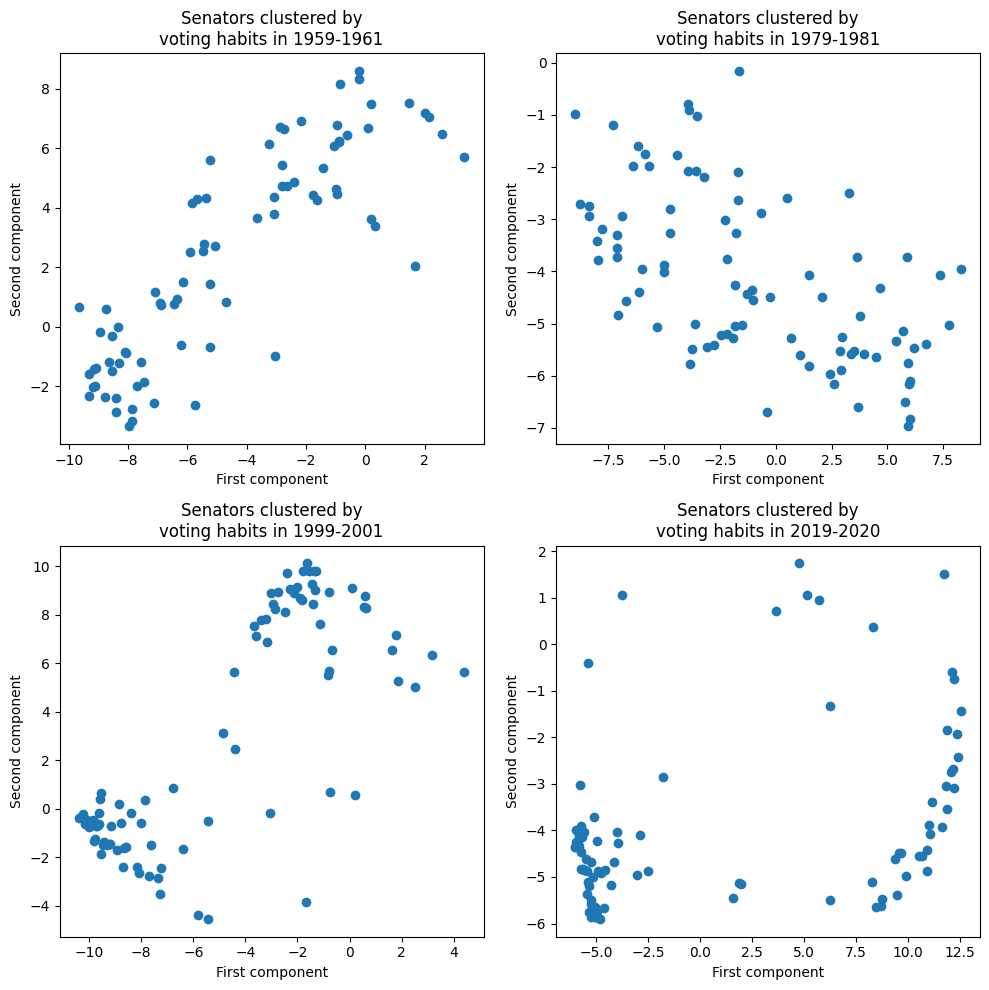

In [ ]:
# Code for Problem 10

# Load data from each CSV file
data086 = np.genfromtxt('/S086_votes.csv', delimiter=',', dtype=np.int8)
data096 = np.genfromtxt('/S096_votes.csv', delimiter=',', dtype=np.int8)
data106 = np.genfromtxt('/S106_votes.csv', delimiter=',', dtype=np.int8)
data116 = np.genfromtxt('/S116_votes.csv', delimiter=',', dtype=np.int8)

# We need to transform the data into what we want
# We want the issues, members, and vote outcome for the plot, so we identify which columns are what
issues086 = data086[:,2]
issues096 = data096[:,2]
issues106 = data106[:,2]
issues116 = data116[:,2]

members086 = data086[:,3]
members096 = data096[:,3]
members106 = data106[:,3]
members116 = data116[:,3]

member_ids_086 = np.unique(members086)
member_ids_096 = np.unique(members096)
member_ids_106 = np.unique(members106)
member_ids_116 = np.unique(members116)

members086 = [np.where(member_ids_086 == m)[0][0] for m in members086]
members096 = [np.where(member_ids_096 == m)[0][0] for m in members096]
members106 = [np.where(member_ids_106 == m)[0][0] for m in members106]
members116 = [np.where(member_ids_116 == m)[0][0] for m in members116]

votes086 = data086[:,4]
votes096 = data096[:,4]
votes106 = data106[:,4]
votes116 = data116[:,4]

# Cast votes data has 10 integers for each description, map a value to each 1,-1,0 for vote yes, vote no, abstain
yn = [ 0, 1, 1, 1, -1, -1, -1, 0, 0, 0 ]

# Map yn values to the data
votes086 = np.array([yn[v] for v in votes086])
votes096 = np.array([yn[v] for v in votes096])
votes106 = np.array([yn[v] for v in votes106])
votes116 = np.array([yn[v] for v in votes116])

A086 = np.zeros((len(member_ids_086), max(issues086)+1))
for member, issue, vote in zip(members086, issues086, votes086):
    A086[int(member),int(issue)] = vote

A096 = np.zeros((len(member_ids_096), max(issues096)+1))
for member, issue, vote in zip(members096, issues096, votes096):
    A096[int(member),int(issue)] = vote

A106 = np.zeros((len(member_ids_106), max(issues106)+1))
for member, issue, vote in zip(members106, issues106, votes106):
    A106[int(member),int(issue)] = vote

A116 = np.zeros((len(member_ids_116), max(issues116)+1))
for member, issue, vote in zip(members116, issues116, votes116):
    A116[int(member),int(issue)] = vote

# Center the data to zero
X086 = A086 - np.mean(A086)
X096 = A096 - np.mean(A096)
X106 = A106 - np.mean(A106)
X116 = A116 - np.mean(A116)

# Singular-value decomposition for all CSV files
U086, s086, VT = np.linalg.svd(X086)
U096, s096, VT = np.linalg.svd(X096)
U106, s106, VT = np.linalg.svd(X106)
U116, s116, VT = np.linalg.svd(X116)


# Create and populate the Sigma matrix
Sigma086 = np.zeros((A086.shape[0], A086.shape[1]))
Sigma086[:A086.shape[0], :A086.shape[0]] = np.diag(s086)
n_elements = 2
Sigma086 = Sigma086[:, :n_elements]

Sigma096 = np.zeros((A096.shape[0], A096.shape[1]))
Sigma096[:A096.shape[0], :A096.shape[0]] = np.diag(s096)
n_elements = 2
Sigma096 = Sigma096[:, :n_elements]

Sigma106 = np.zeros((A106.shape[0], A106.shape[1]))
Sigma106[:A106.shape[0], :A106.shape[0]] = np.diag(s106)
n_elements = 2
Sigma106 = Sigma106[:, :n_elements]

Sigma116 = np.zeros((A116.shape[0], A116.shape[1]))
Sigma116[:A116.shape[0], :A116.shape[0]] = np.diag(s116)
n_elements = 2
Sigma116 = Sigma116[:, :n_elements]


# Reconstruct
T086 = U086.dot(Sigma086)
T096 = U096.dot(Sigma096)
T106 = U106.dot(Sigma106)
T116 = U116.dot(Sigma116)

# Plot characteristics
fig,ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(T086[:,0], T086[:,1]);ax[0,0].set_title("Senators clustered by\nvoting habits in 1959-1961");ax[0,0].set_xlabel("First component"); ax[0,0].set_ylabel("Second component")
ax[0,1].scatter(T096[:,0], T096[:,1]);ax[0,1].set_title("Senators clustered by\nvoting habits in 1979-1981");ax[0,1].set_xlabel("First component"); ax[0,1].set_ylabel("Second component")
ax[1,0].scatter(T106[:,0], T106[:,1]);ax[1,0].set_title("Senators clustered by\nvoting habits in 1999-2001");ax[1,0].set_xlabel("First component"); ax[1,0].set_ylabel("Second component")
ax[1,1].scatter(T116[:,0], T116[:,1]);ax[1,1].set_title("Senators clustered by\nvoting habits in 2019-2020");ax[1,1].set_xlabel("First component"); ax[1,1].set_ylabel("Second component")

fig.tight_layout()